# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Далее прочитаем файл с данными и посмотрим информацию по данному файлу

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Найдем явные дубликаты в датафрейме

In [4]:
df.duplicated().sum()

0

Явных дубликатов нет. Это радует.
Теперь можно построить гистограмму по данным

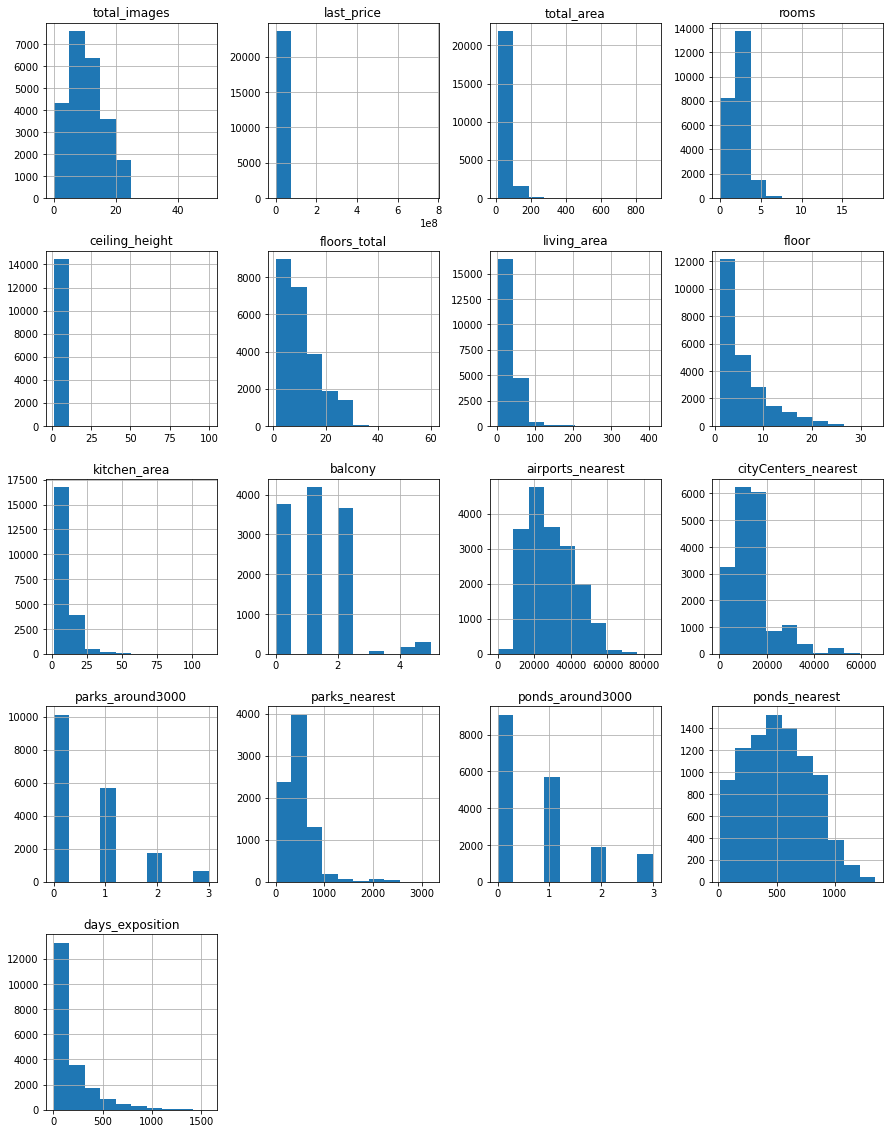

In [5]:
df.hist(figsize=(15,20));

**Вывод:** В данных можно увидеть 23699 записей объявлений. Глядя на некоторые столбцы, можно увидеть пропуски, а также некорректный тип данных для них, исправим в дальнейшем. Рассмотрев внимательно гистаграммы, увидим, что существуют аномальные значения. Продолжим наши исследования .

### Выполните предобработку данных

Уточним количество пропусков в файле

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим неправильные названия в таблице. Заменим их на правильные

In [7]:
df.rename(columns = {"cityCenters_nearest":'city_centers_nearest'}, inplace = True)

Поработаем еще немного с данными
<br>
**total_images** - число фотографий квартиры в объявлении

In [8]:
df['total_images'].astype('int')

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

**last_price** - цена на момент снятия с публикации

In [9]:
df['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

**total_area** - общая площадь квартиры в квадратных метрах (м²)

In [10]:
df['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

**first_day_exposition** - дата публикации

In [11]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

**ceiling_height** - высота потолков. Заменим *NaN* на медианное значение

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

Здесь мы видим явные ошибки. Высота потолков 100м? Не думаю.

In [14]:
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].sort_values(ascending=False).head(30)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
17442     8.00
15743     8.00
3474      8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
6802      4.50
14519     4.50
13224     4.50
10159     4.50
2823      4.50
9783      4.50
3067      4.50
8018      4.45
7521      4.45
6728      4.40
Name: ceiling_height, dtype: float64

Пропуски в **floors_total** - всего этажей в доме заменим на медианные

In [15]:
# Определим функцию
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return df[df['floor'] == row['floor']]['floors_total'].median()
        
df['f'] = df.apply(floors_total, axis=1) 
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = (df['f'] + df['floors_total']).astype('int')
df.drop('f', axis= 1 , inplace= True )
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

**living_area** - жилая площадь

In [16]:
print(f'Доля пропусков {df["living_area"].isna().mean():.2%}')

Доля пропусков 8.03%


жилая площадь **living_area** = общая площадь **total_area** - нежилая площадь {остальное пространство, включающее коридор, кухню, санузел (ванную и туалет), балкон, лоджию, кладовые, прихожие, гардеробные}

**is_apartment** - аппартаменты

In [17]:
print(f'Доля {df["is_apartment"].mean():.2%}')

Доля 1.80%


Среднее указывает, что аппартаментов около 2 % что ближе к действительности, а следовательно при заполнении анкеты их просто неуказали, заполним знечение на **False**

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
df['is_apartment'] = df['is_apartment'].astype(bool)

**kitchen_area** — площадь кухни в квадратных метрах (м²)
<br>
Найдем зависимость столбцов друг от друга при помощи корреляции Пирсона

In [19]:
df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head()

kitchen_area      1.000000
total_area        0.609121
last_price        0.519869
living_area       0.428674
ceiling_height    0.299071
Name: kitchen_area, dtype: float64

In [20]:
print(f'Доля пропусков {df["kitchen_area"].isna().mean():.2%}')

Доля пропусков 9.61%


Явной зависимости нет. Возможно у 10% действительно нет кухни. Как вариант это могут быть коммуналки или, что вероятнее, собственники не указали наличие у себя кухни

In [21]:
#Заменим эти значения на ноль
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'].round(2)

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

**balcony** - балконы
<br>
Так же, как и с кухней, найдем зависимость при помощи корреляции Пирсона и долю пропусков

In [22]:
df.corr().sort_values(by='balcony', ascending=False)['balcony'].head()

balcony         1.000000
floors_total    0.192026
floor           0.168773
total_images    0.121693
kitchen_area    0.114845
Name: balcony, dtype: float64

In [23]:
print(f'Доля пропусков {df["balcony"].isna().mean():.2%}')

Доля пропусков 48.61%


Здесь тоже не прослеживается связь. Однако на отсутствие балконов есть логичная причина - во многих квартирах их действительно нет. Допустим, очень часто их не бывает на первых этажах 

In [24]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype(int)

**locality_name** - населенный пункт

In [25]:
print(f'Доля пропусков {df["locality_name"].isna().mean():.2%}')

Доля пропусков 0.21%


In [26]:
# перевод в строчные буквы
df['locality_name'] = df['locality_name'].str.lower()

# Оставим только названия
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Уникальные значения в алфавитном порядке
set(df['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гости

В данной колонке 49 пропущенных значений, считаю верным решением их заменить на **unknown**

In [27]:
df['locality_name'] = df['locality_name'].fillna('unknown')

**airports_nearest** - расстояние до ближайшего аэропорта (м)

In [28]:
print(f'Доля пропусков {df["airports_nearest"].isna().mean():.2%}')

Доля пропусков 23.38%


In [29]:
df['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

В отсутсвие аэропорта вполне можем поверить. Во многих городах его либо нет, либо он находится очень далеко. 

**city_centers_nearest** - расстояние до центра города (м)

In [30]:
print(f'Доля пропусков {df["city_centers_nearest"].isna().mean():.2%}')

Доля пропусков 23.29%


In [31]:
df['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23699, dtype: float64

Незаполненные пропуски скорее всего, указывают,что объект продажи находится не в городе.

**parks_around3000** — число парков в радиусе 3 км

In [32]:
df['parks_around3000'].round(2)

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around3000, Length: 23699, dtype: float64

In [33]:
print(f'Доля пропусков {df["parks_around3000"].isna().mean():.2%}')

Доля пропусков 23.28%


Незаполненные пропуски скорее всего, указывают,что на таком расстоянии нет парков и значение можно заполнить 0.

In [34]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype(int)

**parks_nearest** - расстояние до ближайшего парка (м)

In [35]:
df['parks_nearest'].round(2)

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [36]:
print(f'Доля пропусков {df["parks_nearest"].isna().mean():.2%}')

Доля пропусков 65.91%


Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от парка.

**ponds_around3000** - число водоёмов в радиусе 3 км

In [37]:
df['ponds_around3000'].round(2)

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    NaN
23696    NaN
23697    3.0
23698    NaN
Name: ponds_around3000, Length: 23699, dtype: float64

In [38]:
print(f'Доля пропусков {df["ponds_around3000"].isna().mean():.2%}')

Доля пропусков 23.28%


Незаполненные пропуски скорее всего, указывают,что на таком расстоянии нет водоемов и значение можно заполнить 0.

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

**ponds_nearest** - расстояние до ближайшего водоёма (м)

In [40]:
df['ponds_nearest'].round(2)

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [41]:
print(f'Доля пропусков {df["ponds_nearest"].isna().mean():.2%}')

Доля пропусков 61.56%


Незаполненные пропуски скорее всего, указывают,что объект продажи находится далеко от водоема.

**days_exposition** - сколько дней было размещено объявление (от публикации до снятия)

In [42]:
df['days_exposition'].round(2)

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

In [43]:
print(f'Доля пропусков {df["days_exposition"].isna().mean():.2%}')

Доля пропусков 13.42%


Незаполненные пропуски скорее всего, указывают, что объект не продан и хотя присутствующие значения "Количество дней" являются целочисленными оставим пока столбец неизменным.

In [44]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**:основными причинами пропусков могли стать:

1)Человеческий фактор.
<br>
2)Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных)
<br>
3)Возможны программные сбои
<br>
4)Доработка системы во время её работы (ранее введенные данные не откорректированы)
<br>
<br>
Также:
- В столбце last_price изменен тип данных
- Столбец first_day_exposition содержит тип данных datetime64[ns]
- floors_total как и last_price теперь содержит только целые числа
- is_apartment теперь содержит булевы значения
- balcony, parks_around3000, ponds_around3000 тоже изменен на целые числа 

### Добавьте в таблицу новые столбцы

Добавим столбец **price_square_meter** с ценой одного квадратного метра объекта с точностью до двух знаков после запятой

In [45]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

Добавим столбец **day_publication** день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [46]:
df['day_publication'] = df['first_day_exposition'].dt.weekday 
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

Добавим столбец **month_publication** месяц публикации объявления

In [47]:
df['month_publication'] = df['first_day_exposition'].dt.month 
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

Добавим столбец **year_publication** год публикации объявления

In [48]:
df['year_publication'] = df['first_day_exposition'].dt.year 
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

Добавим столбец **type_apartment_floor** тип этажа квартиры (значения — «первый», «последний», «другой»)

In [49]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_apartment_floor'] = df.apply(floor, axis=1) 
df['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавим столбец **distance_city**_center расстояние до центра города в километрах (переведём из **м** в **км** и округлим до ближайших целых значений)

In [50]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Проведите исследовательский анализ данных

**Изучение и описание зависимости количества квартир в продаже от отдельных параметров**
<br>
<br>
**Анализ общей площади**

In [51]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Оставим значения от минимального 12 до 100 кв. метров построим гистограмму**

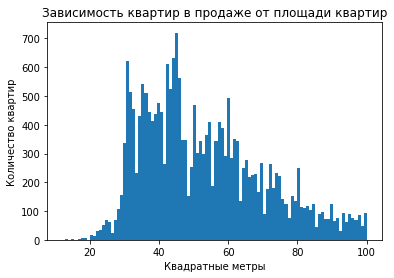

In [52]:
plt.hist(df['total_area'], bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод по данной зависимости:** На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

**Анализ жилой площади**

In [53]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Оставим значения от минимального 12 до 42 кв. метров

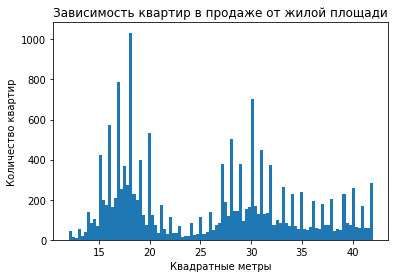

In [54]:
plt.hist(df['living_area'], bins=100, range=(12,42))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.**

**Анализ площади кухни**

In [55]:
df['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

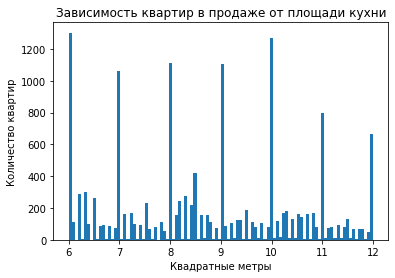

In [56]:
plt.hist(df['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.**

**Анализ цены**

In [57]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

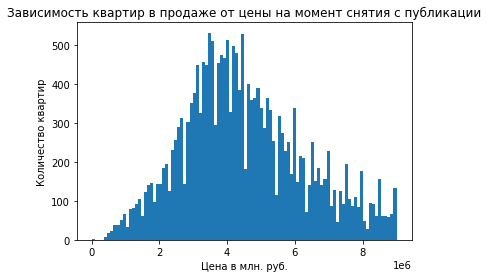

In [58]:
plt.hist(df['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

**Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.**
<br>
P.S. личная боль, что квартиры такие дорогие :(

**Количество комнат**

In [59]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

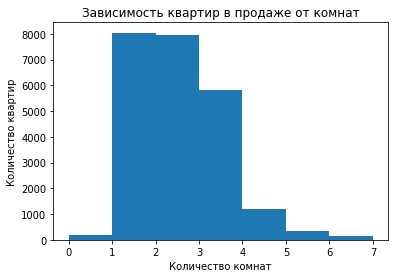

In [60]:
plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно. Скорее всего потому, что людям зачастую не хватает на трех- и более комнатные квартиры**

**Высота потолков**

In [61]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

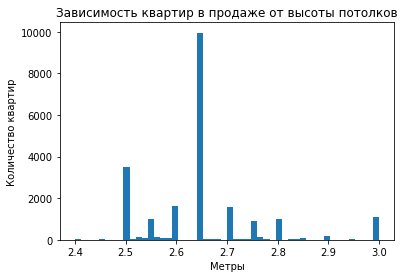

In [62]:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.**

**Тип этажа квартиры («первый», «последний», «другой»)**

In [63]:
df['type_apartment_floor'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: type_apartment_floor, dtype: object

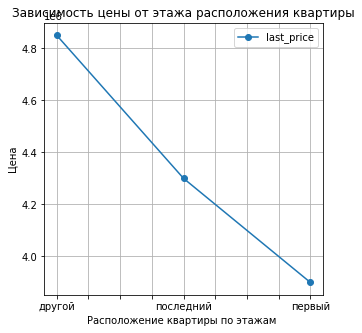

In [64]:
(
    df.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

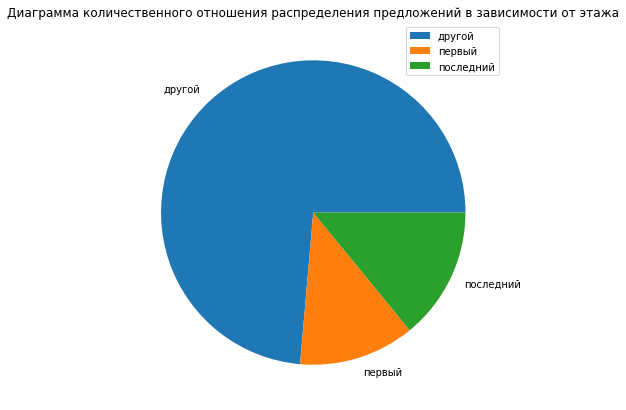

In [65]:
df.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди хотят сьехать с этих этажей. Что неудевительно. На последнем этаже зачастую можно долгое время ждать лифт. На первом бывает много сырости

**Общее количество этажей в доме**

In [66]:
df['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

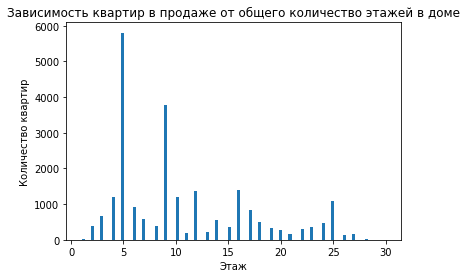

In [67]:
plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках. Возможно люди хотят иметь меньше соседей у себя в доме. Или это может быть связано с парковочным местом возле дома

**Расстояние до центра города в метрах**

In [68]:
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

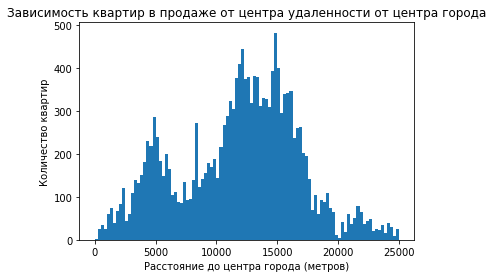

In [69]:
plt.hist(df['city_centers_nearest'], bins=100, range=(0,25000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)), и значительным всплеском на расстоянии в 5000 метров от центра города.**

**Расстояние до ближайшего парка**

In [70]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

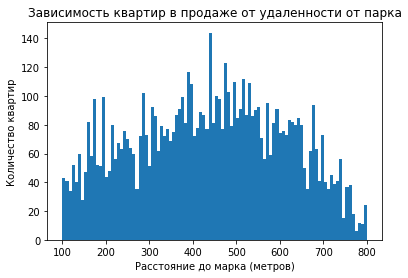

In [71]:
plt.hist(df['parks_nearest'], bins=100, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

**Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.**

**Общий вывод по разделу:**
<br>
<br>
1) На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.
<br>
2) Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.
<br>
3) Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.
<br>
4) Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллиона.
<br>
5) Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.
<br>
6) Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.
<br>
7) Менее ценными считаются квартиры на "первом" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества, значит люди хотят сьехать с этих этажей.
<br>
8) Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
<br>
9) Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров), и значительным всплеском на расстоянии в 5000 метров от центра города.
<br>
10) Количество предложений не сильно зависит от удаленности от ближайшего парка. Среднее расстояние до парка премерно составляет 200 - 700 метров.

**Изучим, как быстро продавались квартиры**

In [72]:
print('Расчитаем показатели')
print(df['days_exposition'].describe())

Расчитаем показатели
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


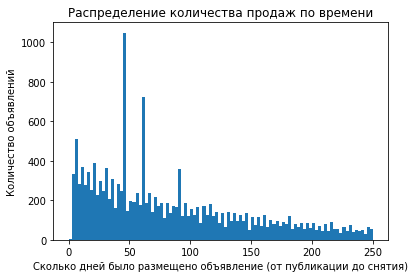

In [73]:
plt.hist(df['days_exposition'], bins=100, range=(0,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

**Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбрасов и нестандартных значений.**
<br>
**В среднем продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов(площади, цены, удалённости от центра).**
<br>
**Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи после 232 дня и более (после 3 квартиля), которые вообще могут быть не проданными.**

**Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта**
<br>
<br>
Для этого изучим зависимость цены **last_price** от столбцов с числовыми данными при помощи вычисления корреляции:

In [74]:
print('Корреляция:','\n')
print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publication','month_publication','year_publication']).corr(),'\n')

Корреляция: 

                   day_publication  kitchen_area  last_price  living_area  \
day_publication           1.000000      0.551975    0.323738     0.083444   
kitchen_area              0.551975      1.000000    0.284824     0.149369   
last_price                0.323738      0.284824    1.000000     0.655849   
living_area               0.083444      0.149369    0.655849     1.000000   
month_publication         0.269221     -0.009482   -0.019113    -0.154943   
rooms                    -0.059111      0.177180    0.442449     0.897739   
total_area                0.320962      0.454583    0.738972     0.923741   
year_publication          0.181063     -0.254011   -0.052080    -0.068297   

                   month_publication     rooms  total_area  year_publication  
day_publication             0.269221 -0.059111    0.320962          0.181063  
kitchen_area               -0.009482  0.177180    0.454583         -0.254011  
last_price                 -0.019113  0.442449    0.738

In [75]:
print('Корреляция:','\n')
print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.284824     0.149369  0.177180    0.454583
last_price        0.284824    1.000000     0.655849  0.442449    0.738972
living_area       0.149369    0.655849     1.000000  0.897739    0.923741
rooms             0.177180    0.442449     0.897739  1.000000    0.811538
total_area        0.454583    0.738972     0.923741  0.811538    1.000000 



**Корреляция по данным указывает, прямой зависимости среди данных нет. Возможно это произошло из за наличия большого количества редких и выбивающихся значений.**
<br>
<br>
**Проведем обработку этих значений.**

In [76]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    df[col] = quartile_range(df, col)

In [77]:
print('Корреляция:','\n')
print(df.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.507438    -0.108534 -0.132606    0.342559
last_price        0.507438    1.000000     0.725857  0.551637    0.905255
living_area      -0.108534    0.725857     1.000000  0.901722    0.917353
rooms            -0.132606    0.551637     0.901722  1.000000    0.786100
total_area        0.342559    0.905255     0.917353  0.786100    1.000000 



Значения, датафрейма c отброшеными значениями на основе 1.5 размаха, стали лучше и адекватнее. Прослеживается почти прямая зависимость между:
<br>
<br>
- Ценой и общей площадью
- Ценой и количеством комнат

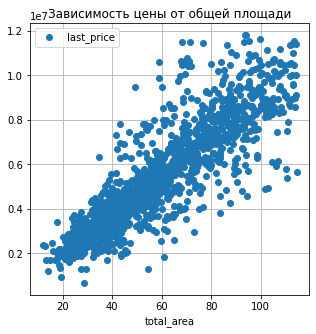

In [78]:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

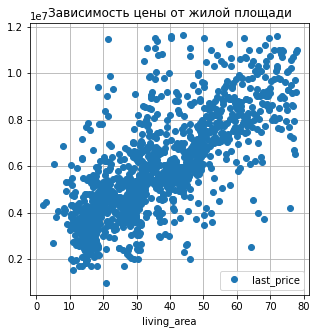

In [79]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

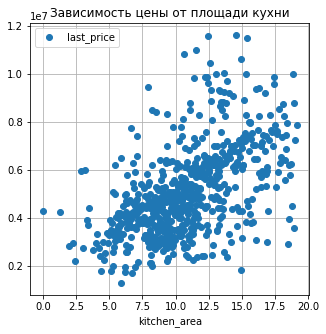

In [80]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

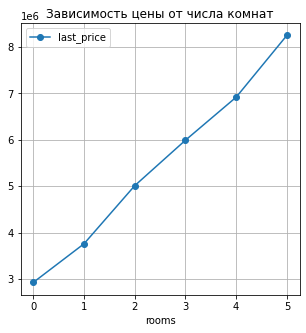

In [81]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

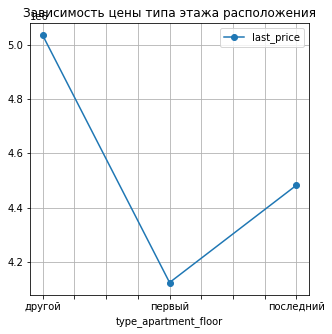

In [82]:
(
    df.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

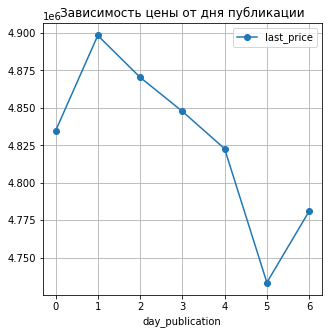

In [83]:
(
    df.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

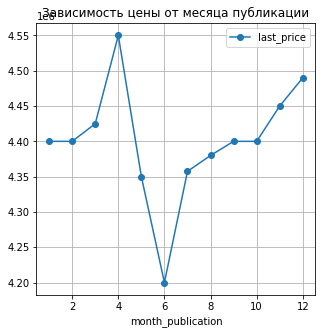

In [84]:
(
    df.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

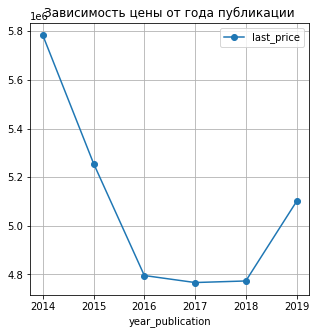

In [85]:
(
    df.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

**Вывод:**
<br>
<br>
- Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
- Число комнат влияет на цену (больше комнат следовательно больше жилая площадь следовательно больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
- Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [86]:
price_sm_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sm_name.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,13737,114849.01
пушкин,338,103125.82
кудрово,470,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,336,75424.58
гатчина,305,68746.15
всеволожск,397,68654.47


Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также не большой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

**Выделим квартиры в Санкт-Петербурге с помощью столбца *locality_name* и вычислим их среднюю стоимость на разном удалении от центра**

In [87]:
df.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

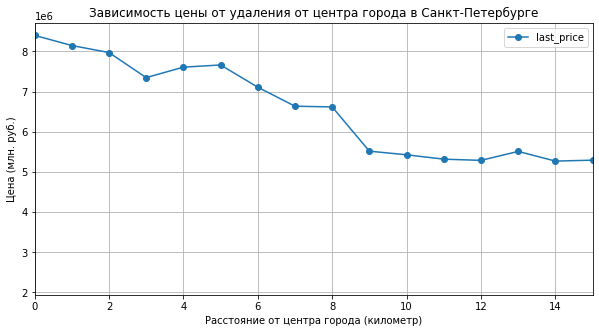

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


In [88]:
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
df.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от удаления.

### Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:
<br>
1) Изучили общую информацию о данных
<br>
- В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.
<br>
2) Выполнена предобработка данных
<br>
- Переименовали название столбца cityCenters_nearest на city_centers_nearest.
- Заполнили явные пропуски в таблице, округлили значение до значащих величин.
- Изменили тип данных, в соответствии с данными находящимися в столбцах.
- Сделали вывод о причинах появления пропусков:
    1. Человеческий фактор.
    2. Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных).
    3. Возможны программные сбои.
    4. Доработка системы во время её работы (ранее введенные данные не откорректированы)
<br>
3) Добавлены новые столбцы в таблицу для проведения следующего этапа
- **price_square_meter** - цена квадратного метра объекта с точностью до двух знаков после запятой.
- **day_publication** - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
- **month_publication** - месяц публикации объявления.
- **year_publication** - год публикации объявления.
- **type_apartment_floor** - тип этажа квартиры (значения — «первый», «последний», «другой»).
- **distance_city_center** - расстояние до центра города в целых километрах.
<br>
4) Проведен исследовательский анализ данных
- Изучены и описаны параметры
    - Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 52 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. или 5 км. от центра города.
- Изучено, как быстро продавались квартиры
    - Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
    - В среднем продажа средне статистической квартиры занимает 2-3 месяца в зависимости от сопутствующих факторов(площади, цены, удалённости от центра).
    - Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи после 232 дня и более (после 3 квартиля), которые могут совсем не продаваться.
- Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта
    - Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
    - Число комнат влияет на цену (больше комнат -> больше жилая площадь -> больше цена), однако зависимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
    - Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    - Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
- Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга
    - Самые дорогие квартиры в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от удаления.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.